# Assignment is at the bottom! 

In [46]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


from sklearn.linear_model import LogisticRegression as Model

In [47]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

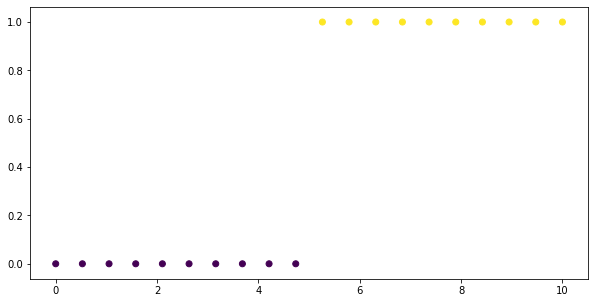

In [48]:
plt.scatter(x, y, c=y)

In [49]:
model = LogisticRegression()

In [50]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

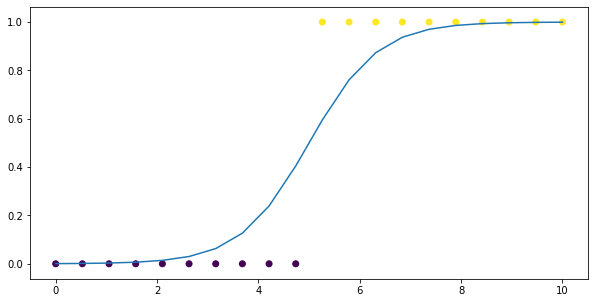

In [51]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [52]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

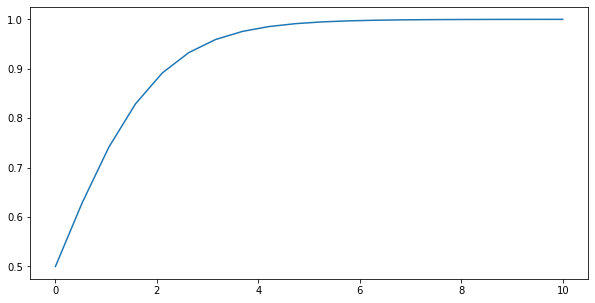

In [53]:
plt.plot(x, 1/(1+np.exp(-x)))

In [54]:
b

array([[1.46709085]])

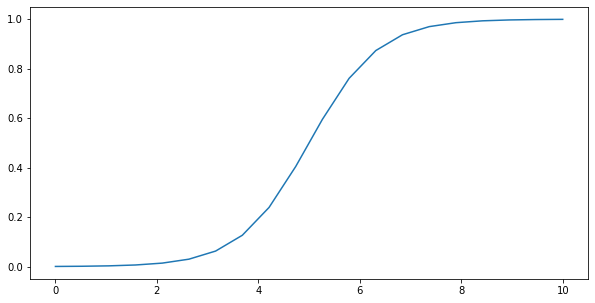

In [55]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

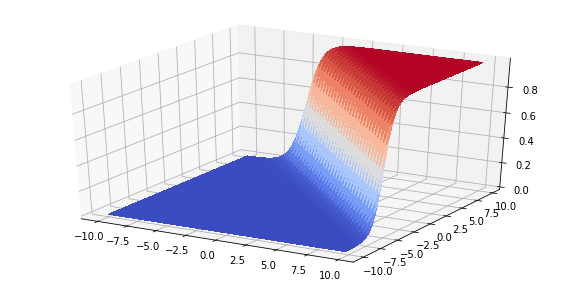

In [56]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [57]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [58]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [59]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

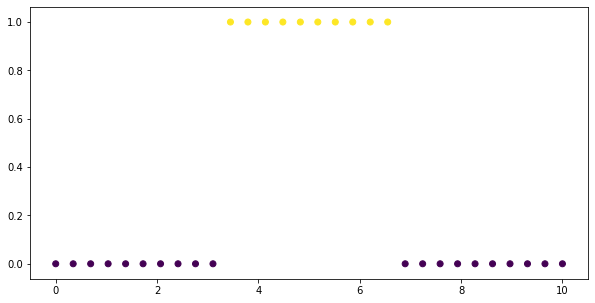

In [60]:
plt.scatter(x,y, c=y)

In [62]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

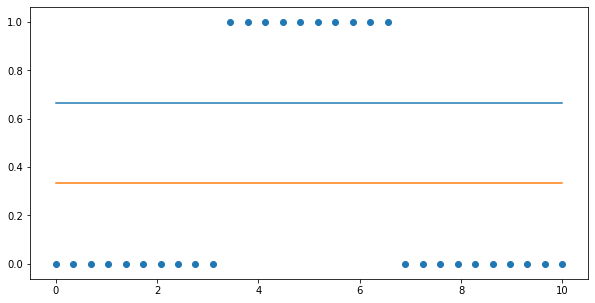

In [63]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [64]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

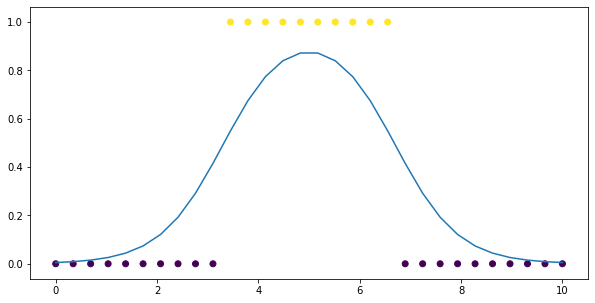

In [66]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [68]:
df = pd.read_csv('../data/adult.data', index_col=False)
golden = pd.read_csv('../data/adult.test', index_col=False)

In [69]:
from sklearn import preprocessing


enc = preprocessing.OrdinalEncoder()

In [70]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [71]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [72]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [73]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [74]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [76]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [77]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [78]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [79]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]], dtype=int64)

In [80]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [81]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (create a train and a test set) and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results.


In [100]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                                'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

abalone = pd.read_csv('abalone.data', header = None, names = columns)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [101]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [102]:
abalone["Sex"] = enc.fit_transform(abalone[["Sex"]])
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [115]:
aby = abalone['Sex']
abx = abalone.drop('Sex', axis = 1)
abx_scaled = preprocessing.scale(abx)

In [128]:
from sklearn.model_selection import train_test_split

abx_train, abx_test, aby_train, aby_test = train_test_split(abx_scaled, aby, test_size=.5)

In [129]:
model_LR = LogisticRegression(max_iter = 500)

model_LR.fit(abx_train, aby_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
pred_LR = model_LR.predict(abx_train)
pred_LR_test = model_LR.predict(abx_test)

In [131]:
accuracy_score(aby_train, pred_LR)

0.564176245210728

In [132]:
accuracy_score(aby_test, pred_LR_test)

0.5605552896122546

In [134]:
confusion_matrix(aby_train, pred_LR)

array([[258,  99, 302],
       [ 44, 550,  77],
       [216, 172, 370]], dtype=int64)

In [135]:
confusion_matrix(aby_test, pred_LR_test)

array([[228, 124, 296],
       [ 29, 562,  80],
       [205, 184, 381]], dtype=int64)

In [136]:
print(classification_report(aby_train, pred_LR))

              precision    recall  f1-score   support

         0.0       0.50      0.39      0.44       659
         1.0       0.67      0.82      0.74       671
         2.0       0.49      0.49      0.49       758

    accuracy                           0.56      2088
   macro avg       0.55      0.57      0.56      2088
weighted avg       0.55      0.56      0.55      2088



In [137]:
print(classification_report(aby_test, pred_LR_test))

              precision    recall  f1-score   support

         0.0       0.49      0.35      0.41       648
         1.0       0.65      0.84      0.73       671
         2.0       0.50      0.49      0.50       770

    accuracy                           0.56      2089
   macro avg       0.55      0.56      0.55      2089
weighted avg       0.55      0.56      0.55      2089



In [182]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(max_depth=3)
model_DT.fit(abx_train, aby_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 237.82500000000002, 'X[5] <= -0.359\ngini = 0.665\nsamples = 2088\nvalue = [659, 671, 758]'),
 Text(139.5, 169.875, 'X[7] <= -0.445\ngini = 0.517\nsamples = 831\nvalue = [117, 537, 177]'),
 Text(69.75, 101.92500000000001, 'X[6] <= -0.884\ngini = 0.356\nsamples = 543\nvalue = [36, 427, 80]'),
 Text(34.875, 33.974999999999994, 'gini = 0.247\nsamples = 365\nvalue = [11, 314, 40]'),
 Text(104.625, 33.974999999999994, 'gini = 0.527\nsamples = 178\nvalue = [25, 113, 40]'),
 Text(209.25, 101.92500000000001, 'X[7] <= -0.135\ngini = 0.662\nsamples = 288\nvalue = [81, 110, 97]'),
 Text(174.375, 33.974999999999994, 'gini = 0.592\nsamples = 103\nvalue = [17, 56, 30]'),
 Text(244.125, 33.974999999999994, 'gini = 0.664\nsamples = 185\nvalue = [64, 54, 67]'),
 Text(418.5, 169.875, 'X[3] <= 0.093\ngini = 0.589\nsamples = 1257\nvalue = [542, 134, 581]'),
 Text(348.75, 101.92500000000001, 'X[3] <= -0.077\ngini = 0.659\nsamples = 330\nvalue = [117, 87, 126]'),
 Text(313.875, 33.9749999999999

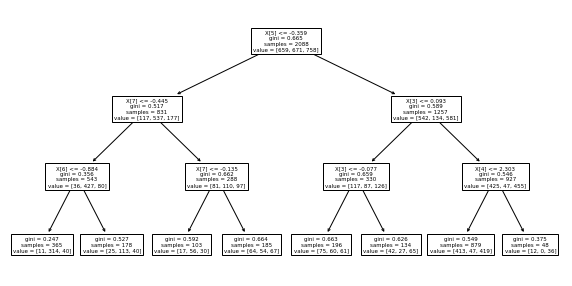

In [183]:
from sklearn import tree

tree.plot_tree(model_DT)

In [173]:
pred_DT = model_DT.predict(abx_train)
pred_DT_test = model_DT.predict(abx_test)

In [174]:
accuracy_score(aby_train, pred_DT)

0.5483716475095786

In [175]:
accuracy_score(aby_test, pred_DT_test)

0.530397319291527

In [176]:
confusion_matrix(aby_train, pred_DT)

array([[ 75,  53, 531],
       [ 60, 483, 128],
       [ 61, 110, 587]], dtype=int64)

In [177]:
confusion_matrix(aby_test, pred_DT_test)

array([[ 53,  69, 526],
       [ 60, 494, 117],
       [ 87, 122, 561]], dtype=int64)

In [178]:
print(classification_report(aby_train, pred_DT))

              precision    recall  f1-score   support

         0.0       0.38      0.11      0.18       659
         1.0       0.75      0.72      0.73       671
         2.0       0.47      0.77      0.59       758

    accuracy                           0.55      2088
   macro avg       0.53      0.54      0.50      2088
weighted avg       0.53      0.55      0.50      2088



In [179]:
print(classification_report(aby_test, pred_DT_test))

              precision    recall  f1-score   support

         0.0       0.27      0.08      0.12       648
         1.0       0.72      0.74      0.73       671
         2.0       0.47      0.73      0.57       770

    accuracy                           0.53      2089
   macro avg       0.48      0.52      0.47      2089
weighted avg       0.49      0.53      0.48      2089



Both the Logistic Regression and Decision Tree (max_depth = 3) models were poor fits for the abalone data in terms of their precision, recall, and f1 scores. The overall accuracy score for both models for the training and the test set were in the mid 50s, effectively classifying just over half of the data correctly. Of the two, the Logistic Regression performed marginally better.

For the test set, the LR model had an accuracy of 0.56, precision ranging from 0.49 to 0.65, recall ranging from 0.35 to 0.84, and an f1-score ranging from 0.41 to 0.73. The DT model had an accuracy of 0.53, precision ranging from 0.27 to 0.72, recall ranging from 0.08 to 0.74, and an f1-score ranging from 0.12 to 0.73. The DT model had lower metric values almost across the board, with greater variance among classes than did the LR model. In both cases, the model performed best when labeling abalone sex as infant. 

As could be expected, the training set predictions had slightly better results across the board. The LR model had an accuracy of 0.56, precision ranging from 0.49 to 0.67, recall ranging from 0.39 to 0.82, and an f1-score ranging from 0.44 to 0.74. The DT model has an accuracy of 0.55, precision ranging from 0.38 to 0.75, recall rangin from 0.11 to 0.77, and an f1-score randing from 0.18 to 0.73. Like the test set, this model performed best when classifying sex = infant. 

## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, does the Logistic Regression have an improvement due to a lower variance?

In [ ]:
#decision tree should overfit, be very deep

In [193]:
model_DT2 = DecisionTreeClassifier(max_depth=10)
model_DT2.fit(abx_train, aby_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(286.21240545382165, 259.44545454545454, 'X[5] <= -0.359\ngini = 0.665\nsamples = 2088\nvalue = [659, 671, 758]'),
 Text(129.25408041401275, 234.73636363636365, 'X[7] <= -0.445\ngini = 0.517\nsamples = 831\nvalue = [117, 537, 177]'),
 Text(53.58976910828026, 210.02727272727273, 'X[6] <= -0.884\ngini = 0.356\nsamples = 543\nvalue = [36, 427, 80]'),
 Text(31.987261146496817, 185.3181818181818, 'X[2] <= 0.251\ngini = 0.247\nsamples = 365\nvalue = [11, 314, 40]'),
 Text(30.21019108280255, 160.60909090909092, 'X[0] <= -0.387\ngini = 0.243\nsamples = 364\nvalue = [10, 314, 40]'),
 Text(28.43312101910828, 135.9, 'X[2] <= -0.646\ngini = 0.239\nsamples = 363\nvalue = [10, 314, 39]'),
 Text(17.770700636942674, 111.19090909090909, 'X[0] <= -1.178\ngini = 0.22\nsamples = 341\nvalue = [7, 299, 35]'),
 Text(8.885350318471337, 86.48181818181817, 'X[6] <= -1.067\ngini = 0.263\nsamples = 245\nvalue = [6, 208, 31]'),
 Text(5.3312101910828025, 61.77272727272728, 'X[5] <= -1.011\ngini = 0.237\nsample

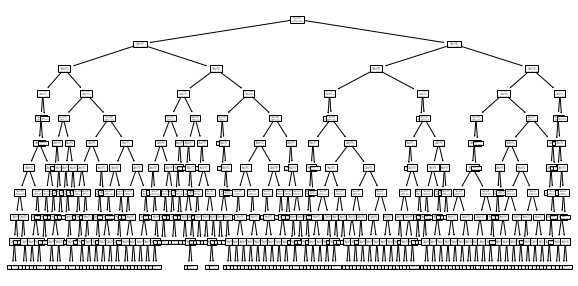

In [194]:
tree.plot_tree(model_DT2)

In [195]:
pred_DT2 = model_DT2.predict(abx_train)
pred_DT2_test = model_DT2.predict(abx_test)

In [196]:
accuracy_score(aby_train, pred_DT2)

0.7610153256704981

In [197]:
accuracy_score(aby_test, pred_DT2_test)

0.533748204882719

In [198]:
confusion_matrix(aby_train, pred_DT2)

array([[412,  16, 231],
       [ 24, 577,  70],
       [116,  42, 600]], dtype=int64)

In [199]:
confusion_matrix(aby_test, pred_DT2_test)

array([[212,  79, 357],
       [ 63, 476, 132],
       [218, 125, 427]], dtype=int64)

In [200]:
print(classification_report(aby_train, pred_DT2)) 

              precision    recall  f1-score   support

         0.0       0.75      0.63      0.68       659
         1.0       0.91      0.86      0.88       671
         2.0       0.67      0.79      0.72       758

    accuracy                           0.76      2088
   macro avg       0.77      0.76      0.76      2088
weighted avg       0.77      0.76      0.76      2088



In [201]:
print(classification_report(aby_test, pred_DT2_test))

              precision    recall  f1-score   support

         0.0       0.43      0.33      0.37       648
         1.0       0.70      0.71      0.70       671
         2.0       0.47      0.55      0.51       770

    accuracy                           0.53      2089
   macro avg       0.53      0.53      0.53      2089
weighted avg       0.53      0.53      0.53      2089



For reference, the results of the Logistic Regression model: for the test set the LR model had an accuracy of 0.56, precision ranging from 0.49 to 0.67, recall ranging from 0.39 to 0.82, and an f1-score ranging from 0.44 to 0.74. For the test set, the LR model had an accuracy of 0.56, precision ranging from 0.49 to 0.65, recall ranging from 0.35 to 0.84, and an f1-score ranging from 0.41 to 0.73. 

The deep (overfitted) Decision Tree classifier with max_depth = 10 outperformed the shallow Decision Tree classifier with regard to the training set, but performed slightly worse on the test set, on average, with greater variance among classes. The training set predictions from the overfitted model had an accuracy of 0.76, precision ranging from 0.67 to 0.91, recall ranging from 0.63 to 0.86, and an f1-score ranging from 0.68 to 0.88. The test set predictions had an accuracy of 0.53, precision ranging from 0.43 to 0.70, recall ranging from 0.33 to 0.71, and an f1-score ranging from 0.37 to 0.70.

Comparing the Logistic Regression model with the overfitted Decision Tree classifier, the Decision Tree performs better on the training set, as would be expected, but the Logistic Regression model still performs better on the test set. For the training set, the DT model scored higher on average with regard to each of the metrics, though with slightly greater variance. For the test set, the LR model scored slightly better with less variance among values for most metrics. For both models, however, the performance was still only slightly better than a coin flip when applied to the test data, suggesting that there is definite room for improvement. Once again, both models performed best when Sex = infant. (1.0)